In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-coronavirus-pandemic/COVID-19 Coronavirus.csv


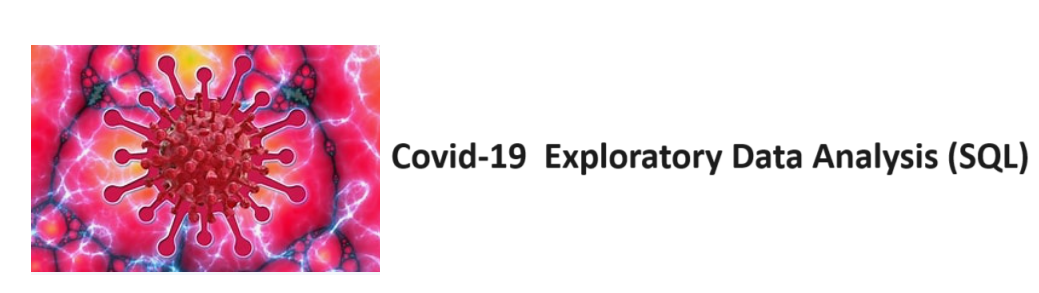

# <font color=#E75480> Load and Understand the Data</font>

## Install packages

In [2]:
# This package integrates SQL with IPython Notebook
!pip install ipython-sql

## Import dependencies

In [3]:
import pandas as pd

# Provides a source od database connectivity
from sqlalchemy import create_engine

# Working with SQLite database in Python 
import sqlite3

In [4]:
data = pd.read_csv('/kaggle/input/covid19-coronavirus-pandemic/COVID-19 Coronavirus.csv')
data.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [5]:
data.shape

(225, 10)

In [6]:
data.columns

Index(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population',
       'Continent', 'Total Cases', 'Total Deaths', 'Tot Cases//1M pop',
       'Tot Deaths/1M pop', 'Death percentage'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


# <font color=#E75480>Data Cleaning</font>

## 1. Check for duplicates

In [8]:
# Calculate the nr of duplicate rows in 'data'
data.duplicated().sum()

0

## 2. Fix column names

In [9]:
data.columns

Index(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population',
       'Continent', 'Total Cases', 'Total Deaths', 'Tot Cases//1M pop',
       'Tot Deaths/1M pop', 'Death percentage'],
      dtype='object')

In [10]:
# Rename columns
data.rename(columns = {'Tot\xa0Cases//1M pop' : 'Total Cases per 1M pop',
                    'Tot\xa0Deaths/1M pop': 'Total Deaths per 1M pop'}, inplace=True)

# Convert column names to lower case
data.columns = data.columns.str.lower()

# Replace spaces with underscore
data.columns = data.columns.str.replace(' ', '_')



In [11]:
data.columns

Index(['country', 'other_names', 'iso_3166-1_alpha-3_code', 'population',
       'continent', 'total_cases', 'total_deaths', 'total_cases_per_1m_pop',
       'total_deaths_per_1m_pop', 'death_percentage'],
      dtype='object')

## 3. Check for Missing Values

In [12]:
data.isnull().sum()

country                    0
other_names                1
iso_3166-1_alpha-3_code    0
population                 0
continent                  0
total_cases                0
total_deaths               0
total_cases_per_1m_pop     0
total_deaths_per_1m_pop    0
death_percentage           0
dtype: int64

In [13]:
data.columns

Index(['country', 'other_names', 'iso_3166-1_alpha-3_code', 'population',
       'continent', 'total_cases', 'total_deaths', 'total_cases_per_1m_pop',
       'total_deaths_per_1m_pop', 'death_percentage'],
      dtype='object')

In [14]:
# Select relevant columns 
df = data[['continent','country', 'population','total_cases', 'total_cases_per_1m_pop', 'total_deaths',
       'total_deaths_per_1m_pop', 'death_percentage']]
df.head()

,continent,country,population,total_cases,total_cases_per_1m_pop,total_deaths,total_deaths_per_1m_pop,death_percentage
0,Asia,Afghanistan,40462186,177827,4395,7671,190,4.313743
1,Europe,Albania,2872296,273870,95349,3492,1216,1.275058
2,Africa,Algeria,45236699,265691,5873,6874,152,2.587216
3,Europe,Andorra,77481,40024,516565,153,1975,0.382271
4,Africa,Angola,34654212,99194,2862,1900,55,1.915438


# <font color=#E75480> SQL Queries</font>

## Loading Data into SQLite Database and Establish a connection

In [15]:
# Initialize a new engine that interfaces with the SQLite database
engine = create_engine('sqlite:///covid_db')

In [16]:
# Connect to the database
conn = engine.connect()

In [17]:
# Write df to SQL database
df.to_sql('covid_data', engine, if_exists='replace', index=False)

225

In [18]:
# Load SQL extension in the IPython environment
%load_ext sql

# Connect to SQLite database: covid_db
%sql sqlite:///covid_db

In [19]:
%%sql
-- List all the tables in the database
SELECT
    name
FROM sqlite_master
WHERE type='table';

 * sqlite:///covid_db
Done.


name
covid_data


In [20]:
%%sql
-- Retrieve the first 5 rows from the table 
SELECT *
FROM covid_data
LIMIT 5;

 * sqlite:///covid_db
Done.


continent,country,population,total_cases,total_cases_per_1m_pop,total_deaths,total_deaths_per_1m_pop,death_percentage
Asia,Afghanistan,40462186,177827,4395,7671,190,4.313743132
Europe,Albania,2872296,273870,95349,3492,1216,1.275057509
Africa,Algeria,45236699,265691,5873,6874,152,2.587215976
Europe,Andorra,77481,40024,516565,153,1975,0.382270638
Africa,Angola,34654212,99194,2862,1900,55,1.915438434


## SQL: Explore the Data

### <font color=indigo> 1. Find the Total Cases and Deaths by Country

In [21]:
%%sql
SELECT 
    country,
    total_cases,
    total_deaths
FROM covid_data
ORDER BY country
LIMIT 10;

 * sqlite:///covid_db
Done.


country,total_cases,total_deaths
Afghanistan,177827,7671
Albania,273870,3492
Algeria,265691,6874
Andorra,40024,153
Angola,99194,1900
Anguilla,2700,9
Antigua and Barbuda,7493,135
Argentina,9041124,128065
Armenia,422574,8617
Aruba,34051,212


### <font color=indigo> 2. Find the Total Population by Continent

In [22]:
%%sql
SELECT 
    continent,
    SUM(population) AS total_population
FROM covid_data
GROUP BY 1
ORDER BY 1;

 * sqlite:///covid_db
Done.


continent,total_population
Africa,1396751613
Asia,4668689344
Europe,748420351
Latin America and the Caribbean,661325824
Northern America,372846593
Oceania,43437948


### <font color=indigo> 3. Find the Average Total Cases and Deaths for each Continent

In [23]:
%%sql
SELECT 
    continent,
    AVG(total_cases) AS avg_total_cases,
    AVG(total_deaths) AS avg_total_deaths
FROM covid_data
GROUP BY 1
ORDER BY 1;

 * sqlite:///covid_db
Done.


continent,avg_total_cases,avg_total_deaths
Africa,202831.1551724138,4359.879310344828
Asia,2876677.1224489794,28673.530612244896
Europe,3756926.7291666665,36994.3125
Latin America and the Caribbean,1406442.3125,35142.25
Northern America,17072954.0,209212.4
Oceania,332232.76470588235,549.1764705882352


### <font color=indigo> 4. Find the Death Percentage by Continent

In [24]:
%%sql
SELECT 
    continent,
    ROUND((SUM(total_deaths)* 1.0/SUM(total_cases)) * 100, 4) AS death_percentage
FROM covid_data
GROUP BY 1
ORDER BY 1;

 * sqlite:///covid_db
Done.


continent,death_percentage
Africa,2.1495
Asia,0.9968
Europe,0.9847
Latin America and the Caribbean,2.4987
Northern America,1.2254
Oceania,0.1653


### <font color=indigo> 5. Find the Top 10 Countries with Highest Cases per Million Population

In [25]:
%%sql
SELECT
    country,
    total_cases_per_1m_pop
FROM covid_data
ORDER BY total_cases_per_1m_pop DESC
LIMIT 10;

 * sqlite:///covid_db
Done.


country,total_cases_per_1m_pop
Faeroe Islands,696044
Iceland,526860
Andorra,516565
Gibraltar,504232
Denmark,500939
Slovenia,468344
Netherlands,459775
San Marino,445766
Latvia,433873
Liechtenstein,428732


### <font color=indigo> 6. Find the Top 10 Countries with Highest Deaths per Million Population

In [26]:
%%sql
SELECT
    country,
    total_deaths_per_1m_pop
FROM covid_data
ORDER BY total_deaths_per_1m_pop DESC
LIMIT 10;

 * sqlite:///covid_db
Done.


country,total_deaths_per_1m_pop
Peru,6286
Bulgaria,5333
Bosnia and Herzegovina,4844
Hungary,4732
North Macedonia,4430
Montenegro,4306
Georgia,4215
Croatia,3842
Czechia,3697
Slovakia,3553


### <font color=indigo> 7. Find the Countries with Death Percentage Above the Overall Average Death Percentage

In [27]:
%%sql

SELECT 
    country,
    death_percentage
FROM covid_data
WHERE death_percentage > ( SELECT 
                               ROUND(AVG(death_percentage),4) AS overall_avg_death_perc
                           FROM covid_data);


 * sqlite:///covid_db
Done.


country,death_percentage
Afghanistan,4.313743132
Algeria,2.587215976
Angola,1.915438434
Antigua and Barbuda,1.801681569
Armenia,2.039169471
Bahamas,2.36672173
Bangladesh,1.492081546
Bolivia,2.426289382
Bosnia and Herzegovina,4.184001299
Brazil,2.200910166


### <font color=indigo> 8. Find the Countries with Total Cases above the Average of their Respective Continents

In [28]:
%%sql
WITH continent_cases AS (
    SELECT
        continent,
        SUM(total_cases) AS continent_total_cases
    FROM covid_data
    GROUP BY 1
)

SELECT 
    country
FROM covid_data
    WHERE total_cases > ( SELECT
                            AVG(continent_total_cases) 
                          FROM continent_cases);


 * sqlite:///covid_db
Done.


country


### <font color=indigo> 9. Find the Top 5 Countries with the Highest Death Percentage in each Continent

In [29]:
%%sql
WITH continent_deaths_rank AS (
    SELECT 
        continent,
        country,
        death_percentage,
        RANK()OVER(
            PARTITION BY continent 
            ORDER BY death_percentage DESC)AS rnk
    FROM covid_data
)
SELECT
    continent, 
    country,
    death_percentage
FROM continent_deaths_rank
WHERE rnk <= 5;

 * sqlite:///covid_db
Done.


continent,country,death_percentage
Africa,Western Sahara,10.0
Africa,Sudan,7.920264708
Africa,Somalia,5.106060606
Africa,Egypt,4.832523196
Africa,Liberia,3.972972973
Asia,Yemen,18.15178723
Asia,Syria,5.64340974
Asia,Afghanistan,4.313743132
Asia,Taiwan,3.508844097
Asia,Myanmar,3.175975485


### <font color=indigo> 10. Find the Total Population for each Continent and the Percentage of the World Population

In [30]:
%%sql
WITH continent_pop AS (
    SELECT
        continent,
        SUM(population) AS total_population
    FROM covid_data
    GROUP BY 1
    ORDER BY 1
)

SELECT 
    continent,
    total_population,
    ROUND((total_population * 1.0)/(SELECT SUM(population) FROM covid_data) * 100,2) AS perc_of_world_pop
FROM continent_pop




--  (SELECT SUM(population) FROM covid_data) AS world_population

 * sqlite:///covid_db
Done.


continent,total_population,perc_of_world_pop
Africa,1396751613,17.7
Asia,4668689344,59.16
Europe,748420351,9.48
Latin America and the Caribbean,661325824,8.38
Northern America,372846593,4.72
Oceania,43437948,0.55
